In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import math
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive 
# drive.mount('/content/drive')
input_dir = "./"
file1 = os.path.join(input_dir, "Datenanordnung.csv") 
file2 =  os.path.join(input_dir,  "edata.csv") 


In [3]:
def plot_bar(columns, group_id):
    rank_list = []


    # collect data
    for c in columns:
        rank_list.append(df[c].values[1:])
    rank_list = (np.vstack(rank_list)).T
    rank_list = rank_list.astype(float)
    # print(rank_list)

    # clean data, remove rows containing NaN
    nan_mask = np.isnan(rank_list).any(axis=1)
    rank_list = rank_list[~nan_mask]
    # print(rank_list)

    rank_average = np.average(rank_list, axis=0)
    rank_std = np.std(rank_list, axis=0)
    # print(rank_average)
    # print(rank_std)

    fig, ax = plt.subplots()
    x_value = np.arange(rank_list.shape[1])+1
    # print(rank_average)
    y_value = rank_average
    y_err = rank_std
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
    ax.bar(x_value, y_value)
    ax.errorbar(x_value, y_value,  yerr=y_err, fmt="o", capsize=5, color="black")
    ax.set_xlabel('Image ID')
    ax.set_ylabel('Ranking Score')
    ax.set_title(f'Iamge Group: {group_id}, {len(rank_list)} users have voted')
    plt.show()
    plt.clf()




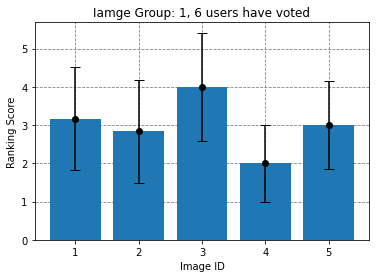

<Figure size 432x288 with 0 Axes>

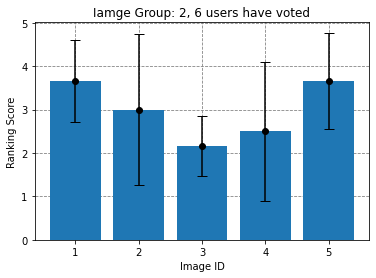

<Figure size 432x288 with 0 Axes>

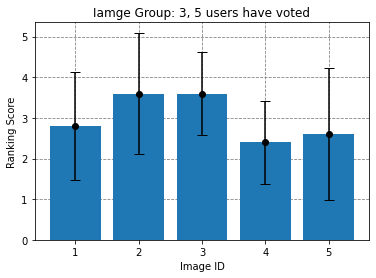

<Figure size 432x288 with 0 Axes>

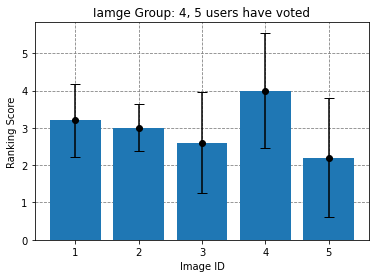

<Figure size 432x288 with 0 Axes>

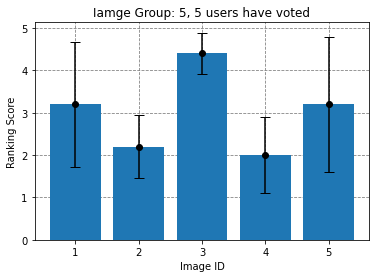

<Figure size 432x288 with 0 Axes>

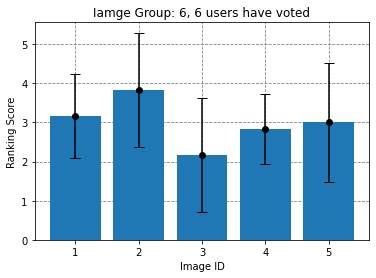

<Figure size 432x288 with 0 Axes>

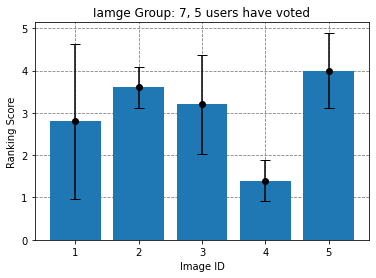

<Figure size 432x288 with 0 Axes>

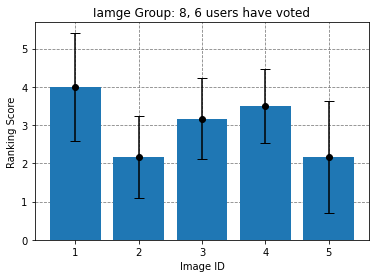

<Figure size 432x288 with 0 Axes>

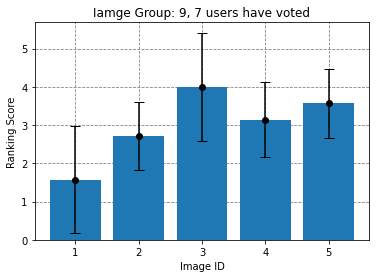

<Figure size 432x288 with 0 Axes>

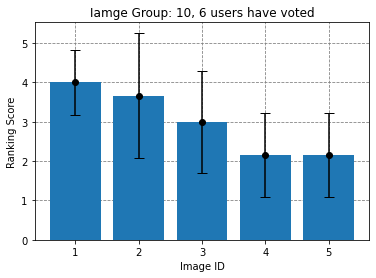

<Figure size 432x288 with 0 Axes>

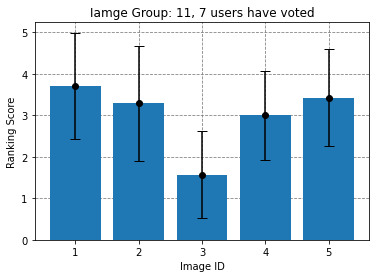

<Figure size 432x288 with 0 Axes>

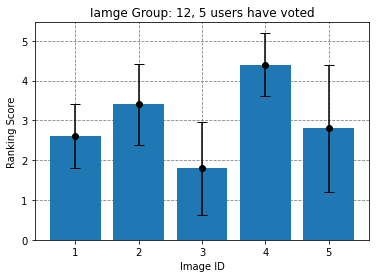

<Figure size 432x288 with 0 Axes>

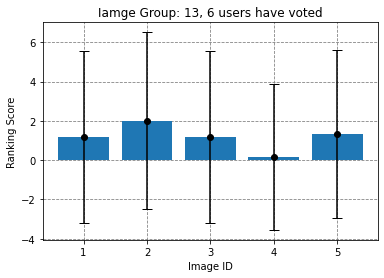

<Figure size 432x288 with 0 Axes>

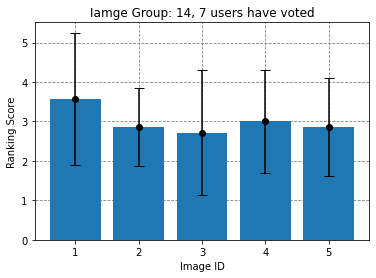

<Figure size 432x288 with 0 Axes>

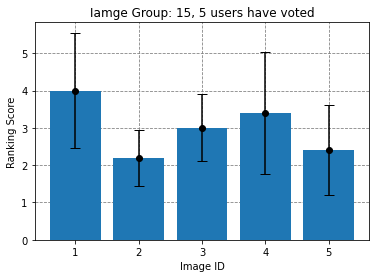

<Figure size 432x288 with 0 Axes>

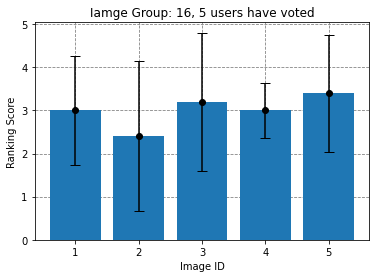

<Figure size 432x288 with 0 Axes>

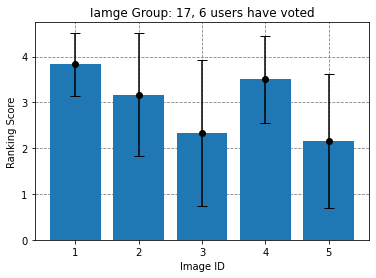

<Figure size 432x288 with 0 Axes>

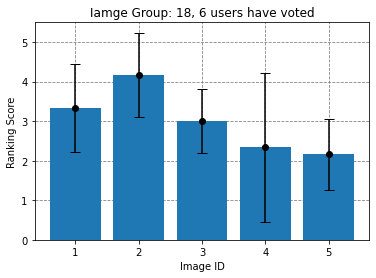

<Figure size 432x288 with 0 Axes>

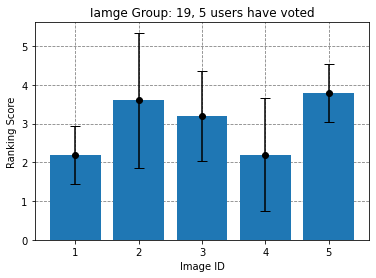

<Figure size 432x288 with 0 Axes>

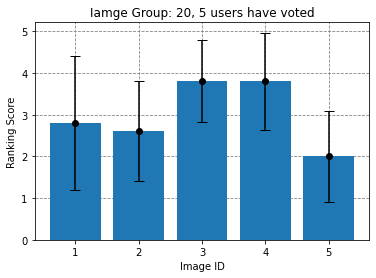

<Figure size 432x288 with 0 Axes>

In [4]:
df = pd.read_csv(file2, encoding="latin-1")

num_images_per_group = 5
num_of_groups = 20


for grp in range(num_of_groups):
    if grp+1 <10:
        columns = [f"B00{grp+1}_0{i+1}" for i in range(num_images_per_group)]
    else:
        columns = [f"B0{grp+1}_0{i+1}" for i in range(num_images_per_group)]
    plot_bar(columns, grp+1)




